In [2]:
import numpy as np


#Init values
kBT = 1.380 * 10**(-23)
T = 300
eta = 1 * 10**(-3)
R = 1 * 10**(-6)
k_x = 1 * 10**(-6)
k_y = 9 * 10**(-6)


In [3]:
def harmonic_trap(x_0, dt, duration, k):
    gamma = 6 * np.pi * eta * R
    D = kBT * T / gamma
    tau = gamma / k


    N = int(np.ceil(duration / dt))
    x = np.zeros(N)

    #Coefficients for x_i calc
    c_1 = (k / gamma)*dt
    c_noise = np.sqrt(2*D*dt)

    rn = np.random.normal(0, 1, N)

    x[0] = x_0
    for i in range(1, N):
        x[i] = x[i-1] - c_1 * x[i-1] + c_noise * rn[i]

    return x, D, tau

##### **Q1** - Calculate $\tau_{trap} = \gamma / k$. Choose a value for $\Delta t$ for the simulation. Write it down. Motivate your choice.

In [10]:
x_0 = 0
y_0 = 0
duration = 30 
dt = 0.00002

x, D_x, tau_x = harmonic_trap(x_0, dt, duration, k_x )
y, D_y, tau_y = harmonic_trap(y_0, dt, duration, k_y )

print(min(tau_x, tau_y))

0.0020943951023931952


We take the min of the stiffnesses for x and y and then pick a $\Delta t \ll \text{min}$. In our case the min is 0.0020943951023931952 so we pick some $\Delta t$ about 100 times smaller than this such as $\Delta t = 0.00002$

##### **P1** - Plot the trajectory of the disk in the Cartesian plane.

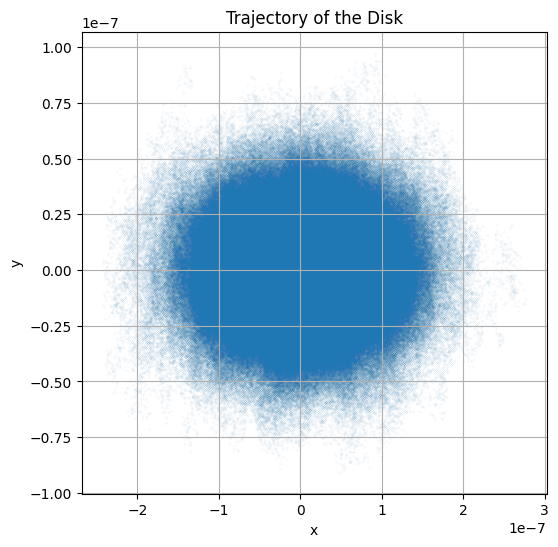

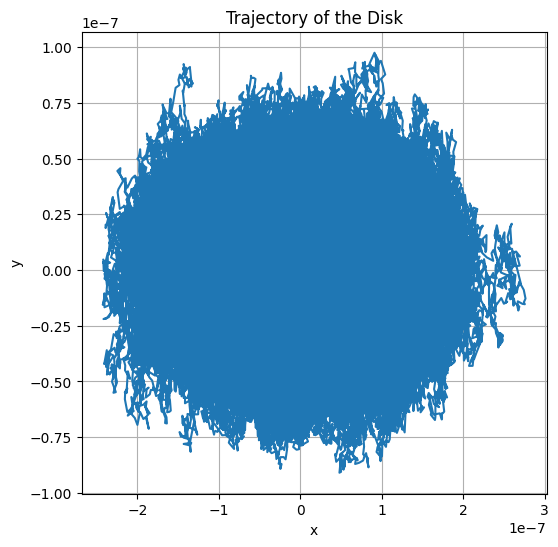

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
plt.scatter(x, y, 0.001)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory of the Disk")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory of the Disk")
plt.grid(True)
plt.show()

##### **P2** - Plot the *probability distribution* of the positions in $x$ and in $y$ (two seperate histograms: one for x and one for y). Compare each case with the expected Boltzmann distribution.

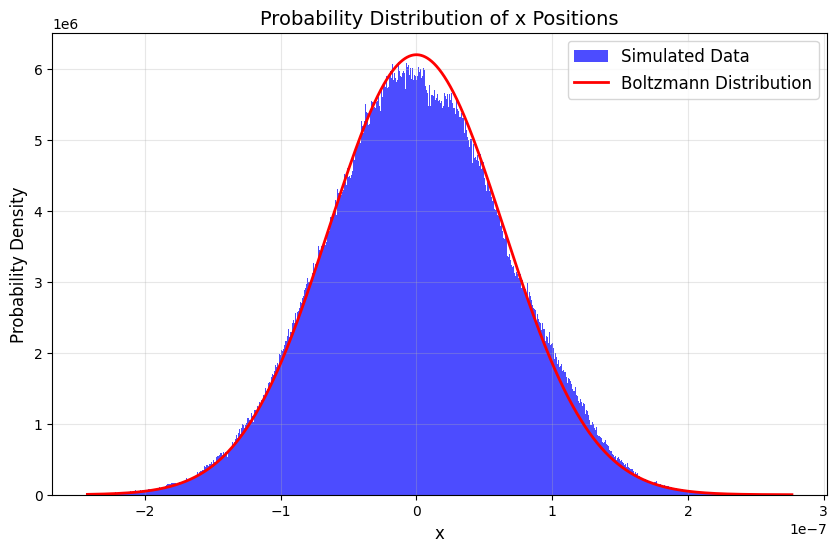

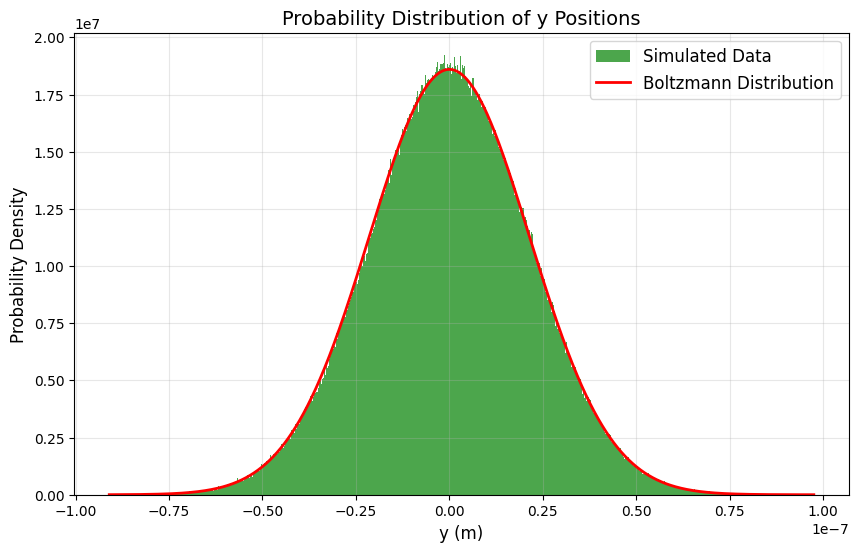

In [12]:
# Histogram for x positions this is normalized by density = True
plt.figure(figsize=(10, 6))
plt.hist(x, bins=1000, density=True, alpha=0.7, color='blue', label='Simulated Data')
plt.title('Probability Distribution of x Positions', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

# Boltzmann distribution
x_vals = np.linspace(min(x), max(x), 10000)
#sqrt part is normalization factor and exp is probability term
boltzmann_x = np.sqrt(k_x / (2 * np.pi * kBT * T)) * np.exp(-k_x * x_vals**2 / (2 * kBT * T))
plt.plot(x_vals, boltzmann_x, color='red', lw=2, label='Boltzmann Distribution')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()



# Histogram for y positions
plt.figure(figsize=(10, 6))
plt.hist(y, bins=1000, density=True, alpha=0.7, color='green', label='Simulated Data')
plt.title('Probability Distribution of y Positions', fontsize=14)
plt.xlabel('y (m)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

# Overlay the Boltzmann distribution for y
ky = 9e-6  # Stiffness in y (N/m)
y_vals = np.linspace(min(y), max(y), 10000)
boltzmann_y = np.sqrt(ky / (2 * np.pi * kBT * T)) * np.exp(-ky * y_vals**2 / (2 * kBT * T))
plt.plot(y_vals, boltzmann_y, color='red', lw=2, label='Boltzmann Distribution')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

##### **Q2** Calculate the *variance* of the $x$ and $y$ positions. Which one has the larger variance? Check and compare the theoretical value for the variance in a harmonic trap.

In [13]:
var_x_sim = np.mean(x**2)
var_y_sim = np.mean(y**2)

var_x_theoretical = kBT * T / k_x
var_y_theoretical = kBT * T / k_y

print("Simulated sigma_x^2 = ", var_x_sim, ", Theoretical sigma_x^2 = ", var_x_theoretical)

print("Simulated sigma_y^2 = ", var_y_sim, ", Theoretical sigma_y^2 = ", var_y_theoretical)

Simulated sigma_x^2 =  4.4248025628974435e-15 , Theoretical sigma_x^2 =  4.1399999999999994e-15
Simulated sigma_y^2 =  4.59532055796265e-16 , Theoretical sigma_y^2 =  4.599999999999999e-16


##### **P3** Calculate and plot the position autocorrelation function. Compare with the theoretical value for a harmonic trapping potential.

In [ ]:
import numba
import numpy as np

@numba.jit(nopython=True)  # JIT compilation for performance
def calculate_autocorrelation(x):
    N = len(x)
    autocorr = np.zeros(N)  # Initialize an array to store autocorrelations
    
    for n in range(N):
        if n % 100 == 0:
            print(n)
        
        c_1 = 1 / (N - n)
        summation = 0
        for i in range(0, N - n):
            summation += x[i + n] * x[i]
        autocorr[n] = c_1 * summation
    
    return autocorr

In [16]:
def theoretical_autocorrelation(t, k):
    gamma = 6 * np.pi * eta * R
    return (kBT * T / k) * np.exp(-k*t / gamma)

In [19]:
C_x_sim = calculate_autocorrelation(x)
C_y_sim = calculate_autocorrelation(y)

t = np.arange(0, duration, dt)
C_x_th = theoretical_autocorrelation(t, k_x)
C_y_th = theoretical_autocorrelation(t, k_y)


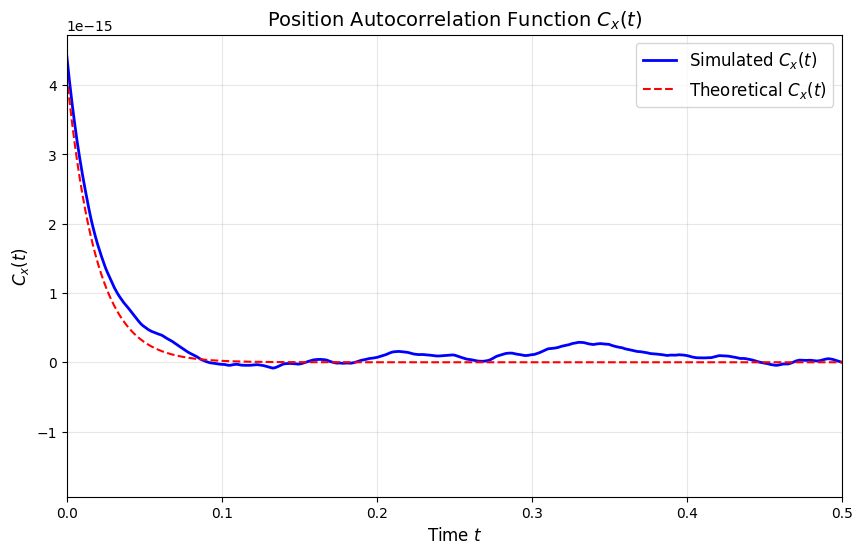

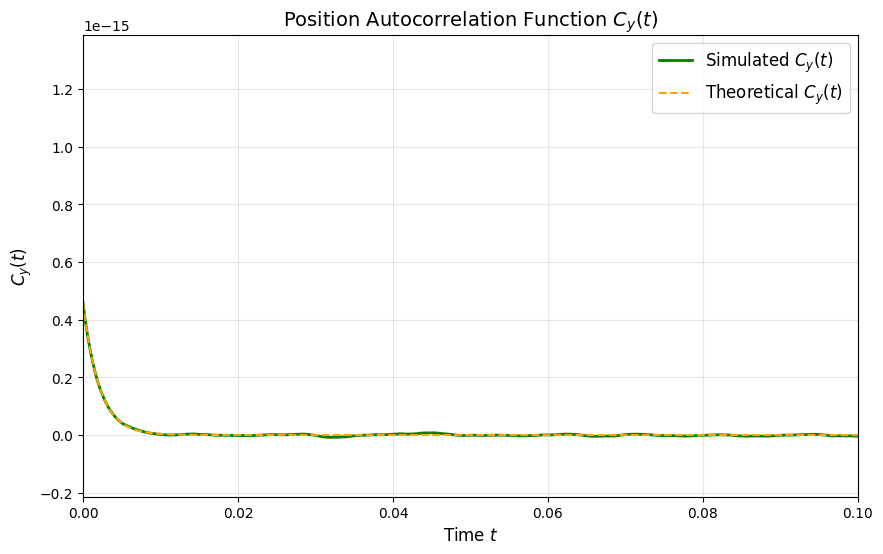

In [ ]:

# Plot the autocorrelatVion functions for x

plt.figure(figsize=(10, 6))
plt.plot(t, C_x_sim, label='Simulated $C_x(t)$', color='blue', lw=2)
plt.plot(t, C_x_th, label='Theoretical $C_x(t)$', color='red', linestyle='--')
plt.title('Position Autocorrelation Function $C_x(t)$', fontsize=14)
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('$C_x(t)$', fontsize=12)
plt.legend(fontsize=12)
plt.xlim(0, 0.5)  
plt.grid(alpha=0.3)
plt.show()

# Plot the autocorrelation functions for y
plt.figure(figsize=(10, 6))
plt.plot(t, C_y_sim, label='Simulated $C_y(t)$', color='green', lw=2)
plt.plot(t, C_y_th, label='Theoretical $C_y(t)$', color='orange', linestyle='--')
plt.title('Position Autocorrelation Function $C_y(t)$', fontsize=14)
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('$C_y(t)$', fontsize=12)
plt.legend(fontsize=12)
plt.xlim(0, 0.1) 
plt.grid(alpha=0.3)
plt.show()

#### **EXERCISE 2**



In [5]:
steps = 500
v = 1
alpha = 2

In [ ]:
def levy_1d(steps, v, alpha):
    delta_t = np.random.uniform(0,1, steps)**(-1/(3-alpha))
    x = np.zeros(steps)
    t = np.cumsum(delta_t)
    x[0] = 0
    directions = np.random.choice([-1, 1], steps)
    for i in range(1, steps):
        x[i] = x[i-1] + directions[i-1]*v*delta_t[i]


    return t, x




In [73]:
def LW(T,alpha):
    import numpy as np
    x = []
    t = []
    x.append(0)
    t.append(0)
    V = 1
    while t[-1]<T:
        dt = (1-np.random.rand())**(-1/(3-alpha))          # Flight time distribution
        t.append(t[-1] + dt)
        x.append(x[-1] + V*np.random.choice([-1,1])*dt)    # Particle moves either right or left during flight
    return(np.array(t),np.array(x))

In [4]:

def levy_2d(steps, v, alpha):
    delta_t = np.random.uniform(0,1, steps)**(-1/(3-alpha))
    x = np.zeros(steps)
    y = np.zeros(steps)
    angle = np.zeros(steps)
    t = np.cumsum(delta_t)

    x[0] = 0
    y[0] = 0
    angle[0] = 0
    directions = np.random.uniform(-np.pi,np.pi, steps)

    for i in range(1, steps):
        angle[i] = angle[i-1] + directions[i-1]
        x[i] = x[i-1] + v*np.cos(angle[i-1])*delta_t[i-1]
        y[i] = y[i-1] + v*np.sin(angle[i-1])*delta_t[i-1]


    return t, x, y

In [5]:

def regularize(x_nu, t_nu, t):
    """
    Function to regularize a time non-uniformly sampled trajectory.
    
    Parameters
    ==========
    x_nu : Trajectory (x component) non-uniformly sampled in time.
    t_nu : Time (non-uniform sampling).
    t : Time (wanted sampling).
    """
    x = np.zeros(np.size(t))
    m = np.diff(x_nu) / np.diff(t_nu)  # Slopes of the different increments.

    s = 0  # Position in the wanted trajectory.
    for i in range(np.size(t_nu) - 1):
        
        # Select the spots in x (wanted trajectory) to set.
        s_end = np.where(t < t_nu[i+1])[0][-1]                 

        # Assign the values of the segment.
        x[s:s_end + 1] = x_nu[i] + m[i] * (t[s:s_end + 1]-t_nu[i]) 
        
        # Update the position in the wanted trajectory.
        s = s_end + 1                                           
        
    return x


#### **P1** - Generate five different LW trajectories in one dimension for $\alpha = 2$, v = 1. Plot them on the same plot.

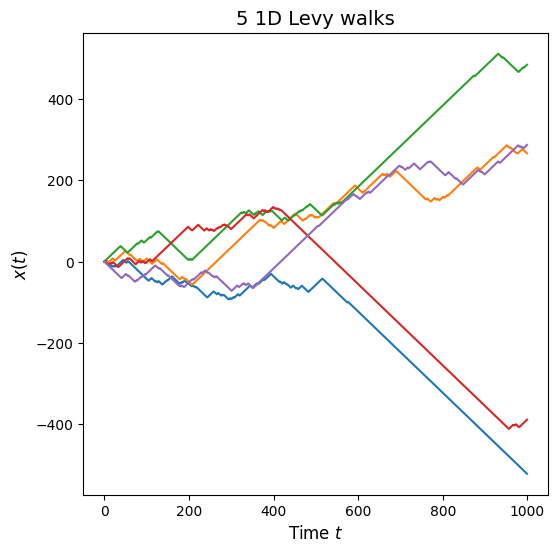

In [74]:
import matplotlib.pyplot as plt

walks = []
walks_alt = []
dt = 0.1
t = np.arange(0, steps)
for i in range(5):
    tau, x = LW(steps, alpha)
    walks_alt.append((x, tau))
    x_r = regularize(x, tau, t)
    walks.append(x_r)



plt.figure(figsize=(6, 6))
for walk in walks:
    plt.plot(t , walk)


plt.title('5 1D Levy walks', fontsize=14)
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('$x(t)$', fontsize=12)
plt.show()

#### **P2** - Same in 2D

C:\Users\Viggo\AppData\Local\Temp\ipykernel_18708\1181166046.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


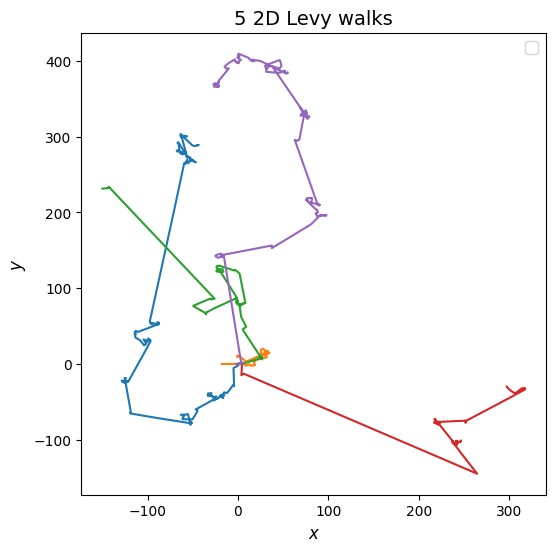

In [27]:
import numpy as np
import matplotlib.pyplot as plt

walks_x = []
walks_y = []
dt = 0.1
t = np.arange(0, steps)
for i in range(5):
    tau, x, y = levy_2d(steps, v, alpha)
    x_r = regularize(x, tau, t)
    y_r = regularize(y, tau, t)
    walks_x.append(x_r)
    walks_y.append(y_r)



plt.figure(figsize=(6, 6))
for i in range(5):
    plt.plot( walks_x[i], walks_y[i])

plt.title('5 2D Levy walks', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(fontsize=12)
plt.show()

#### **P3** - Calculate and plot the eMSD and tMSD for the 1D LW with $\alpha=2$.

In [6]:

import math
import numpy as np 

def tMSD_1d(x, L):
    """
    Function to calculate the tMSD.
    
    Parameters
    ==========
    x : Trajectory (x component).
    L : Indicates the maximum delay (L * dt) considered.
    """

    tmsd = np.zeros(L)
    
    nelem = np.size(x)

    for n in range(L):
        Nmax = nelem - n
        dx = x[n:nelem] -  x[0: Nmax]
        tmsd[n] += np.mean(dx ** 2)

    return tmsd

In [7]:

def eMSD_1d(x):
    """
    Function to calculate the eMSD.
    
    Parameters
    ==========
    x : Trajectories: x[n_traj, i], bidimensional array.
    """

    N_traj, N_steps = x.shape
    
    # emsd = np.zeros(N_steps)
    
    emsd = np.mean(
        (x - np.repeat(x[:, 0].reshape(N_traj, 1), N_steps, axis=1)) ** 2,
        axis=0
    )
    
    return emsd

In [51]:
def regularize2(x,t,T):
    m = np.diff(x)/np.diff(t)                             # Slopes of the different increments 
    t_r = np.arange(T)                                    # Regular times
    x_r = np.zeros(len(t_r))                              # Regularized position array 
    s = 0                                                 # Section number
    for i in range(len(t)-1):
        f = np.where(t_r < t[i+1])[0][-1]                 # Find the end of the segment that the values are to be assigned
        x_r[s:f+1] = x[i] + m[i] * (t_r[s:f+1]-t[i])      # Assign the values of the segment
        s = f+1                                           # Assign the beginning of the next segment 
    return(x_r)

In [95]:
alpha = 2

t_tot = 10000
steps = 100000
dt = 0.1

t_t = np.arange(int(np.ceil(t_tot / dt)))*dt
N_steps_t = np.size(t_t)

t_nu, x_t = LW(steps, alpha)
x_t_r = regularize(x_t, t_nu, t_t)


#----------------------------------
#Ensamble

t_tot = 100
steps = 10000
dt = 0.1

t_e = np.arange(int(np.ceil(t_tot/dt))) * dt
N_steps_e = np.size(t_e)

N_traj = 1000

x_e = np.zeros([N_traj, N_steps_e])

for i in range(N_traj):
    t_nu, x = LW(steps, alpha)
    x_r = regularize(x, t_nu, t_e)
    x_e[i, :] = x_r

# Calculate eMSD
emsd = eMSD_1d(x_e)  # eMSD from ensemble trajectories.

# Calculate tMSD
tmsd = tMSD_1d(x_t, N_steps_e)  # tMSD from long trajectory.

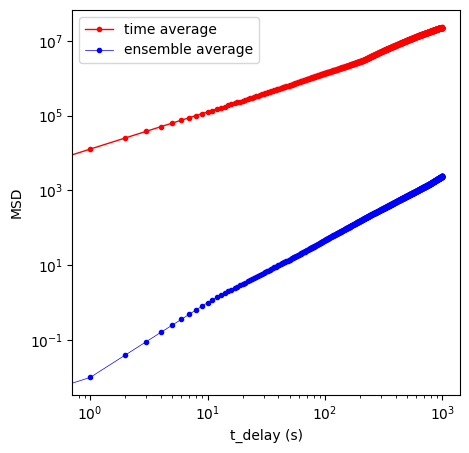

In [96]:
plt.figure(figsize=(5,5))
plt.loglog(tmsd, '.-', color='r', linewidth=1, 
         label='time average')
plt.loglog(emsd, '.-', color='b', linewidth=0.5, 
         label='ensemble average')
plt.legend()
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

#### **TASK 3**

##### **P1** - Plot the dependence for the term s(x)



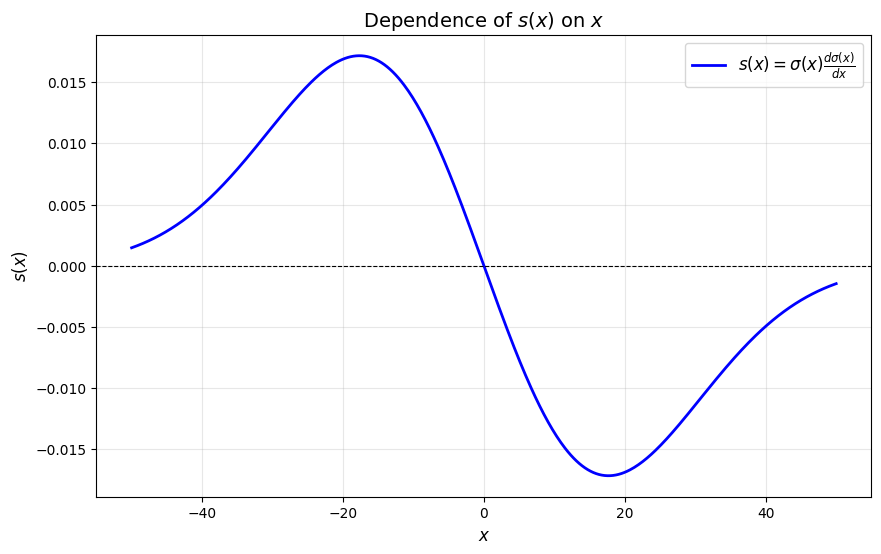

In [42]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time steps
t0 = 100  # Base value of the duration.

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.

w0 = 25
sigma0 = 1

x = np.linspace(-L/2, L/2, 500)

s_x = -x * (sigma0/w0)**2 * np.exp(-x**2 / w0**2)


# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, s_x, label='$s(x) = \\sigma(x) \\frac{d\\sigma(x)}{dx}$', color='blue', lw=2)
plt.title('Dependence of $s(x)$ on $x$', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$s(x)$', fontsize=12)
plt.axhline(0, color='black', linestyle='--', lw=0.8)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

##### **P2** $\alpha = 0$

In [51]:

alpha = 0

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 5, 10, 25, 50, 100])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

w0 = 25
sigma0 = 1



x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 * np.exp(- x**2 / (2* w0**2))  # Multiplicative noise.
        dsigma_dx = -sigma0 * x / w0**2 * np.exp(-(x / w0 )**2)
        dx_spurious = alpha * sigma_x * dsigma_dx * dt
        x += dx_spurious + sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x


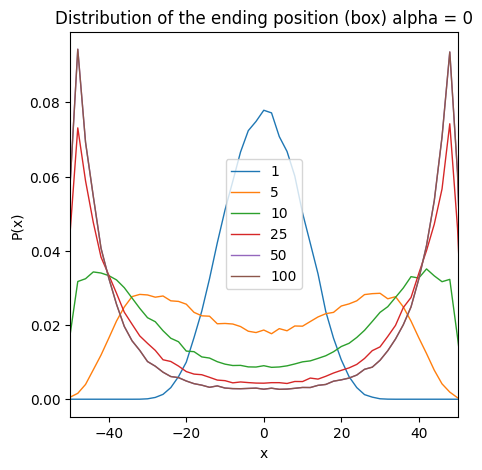

In [52]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position (box) alpha = 0')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()

##### **P3** $\alpha = 0.5$

In [47]:
alpha = 0.5

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 5, 10, 25, 50, 100])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

w0 = 25
sigma0 = 1



x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 * np.exp(- x**2 / (2* w0**2))  # Multiplicative noise.
        dsigma_dx = -sigma0 * x / w0**2 * np.exp(-(x / w0 )**2)
        dx_spurious = alpha * sigma_x * dsigma_dx * dt
        x += dx_spurious + sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x


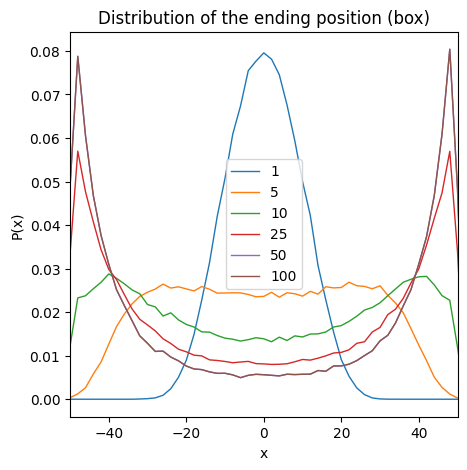

In [ ]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position (box) alpha = 0.5')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()

##### **P4** $\alpha = 1$

In [49]:
alpha = 1

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 5, 10, 25, 50, 100])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

w0 = 25
sigma0 = 1



x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 * np.exp(- x**2 / (2* w0**2))  # Multiplicative noise.
        dsigma_dx = -sigma0 * x / w0**2 * np.exp(-(x / w0 )**2)
        dx_spurious = alpha * sigma_x * dsigma_dx * dt
        x += dx_spurious + sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x


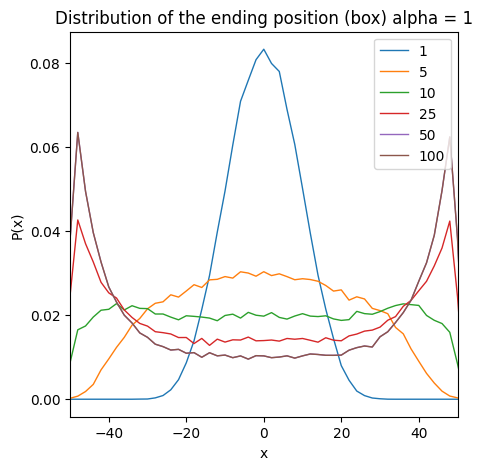

In [50]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position (box) alpha = 1')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()

#### **Q1** - Comment your plots: are the distribution of the final points symmetrical? Why or why not?

Possible Explanation for Symmetry:

$x_{j+1} = x_j + \alpha \sigma(x_j)\frac{d\sigma(x_j)}{dx}\Delta t + \sigma(x_j)\sqrt{\Delta t}w_i, \text{   } \sigma(x)=\sigma_0 \exp(-\frac{x^2}{2w_{0}^2})$

All the plots are symmetric, probably due to the fact that the noise-induced drift term is symmetric (as shown in P1) and the last term is also symmetric due to definition of $\sigma$. 


##### **Exercise 4.** 

In [98]:
import math
import numpy as np 
    
def replicas(x, y, L):
    """
    Function to generate replicas of a single particle.
    
    Parameters
    ==========
    x, y : Position.
    L : Side of the squared arena.
    """    
    xr = np.zeros(9)
    yr = np.zeros(9)

    for i in range(3):
        for j in range(3):
            xr[3 * i + j] = x + (j - 1) * L
            yr[3 * i + j] = y + (i - 1) * L
    
    return xr, yr

In [99]:
def pbc(x, y, L):
    """
    Function to enforce periodic boundary conditions on the positions.
    
    Parameters
    ==========
    x, y : Position.
    L : Side of the squared arena.
    """   
    
    outside_left = np.where(x < - L / 2)[0]
    x[outside_left] = x[outside_left] + L

    outside_right = np.where(x > L / 2)[0]
    x[outside_right] = x[outside_right] - L

    outside_up = np.where(y > L / 2)[0]
    y[outside_up] = y[outside_up] - L

    outside_down = np.where(y < - L / 2)[0]
    y[outside_down] = y[outside_down] + L
    
    return x, y

In [100]:
from functools import reduce

def interaction(x, y, theta, Rf, L):
    """
    Function to calculate the orientation at the next time step.
    
    Parameters
    ==========
    x, y : Positions.
    theta : Orientations.
    Rf : Flocking radius.
    L : Dimension of the squared arena.
    s : Discrete steps.
    """
    
    N = np.size(x)

    theta_next = np.zeros(N)
    
    # Preselect what particles are closer than Rf to the boundaries.
    replicas_needed = reduce( 
        np.union1d, (
            np.where(y + Rf > L / 2)[0], 
            np.where(y - Rf < - L / 2)[0],
            np.where(x + Rf > L / 2)[0],
            np.where(x - Rf > - L / 2)[0]
        )
    )

    for j in range(N):
        # Check if replicas are needed to find the nearest neighbours.
        if np.size(np.where(replicas_needed == j)[0]):
            # Use replicas.
            xr, yr = replicas(x[j], y[j], L)
            nn = []
            for nr in range(9):
                dist2 = (x - xr[nr]) ** 2 + (y - yr[nr]) ** 2 
                nn = np.union1d(nn, np.where(dist2 <= Rf ** 2)[0])
        else:
            dist2 = (x - x[j]) ** 2 + (y - y[j]) ** 2 
            nn = np.where(dist2 <= Rf ** 2)[0]
        
        # The list of nearest neighbours is set.
        nn = nn.astype(int)
        
        # Circular average.
        av_sin_theta = np.mean(np.sin(theta[nn]))
        av_cos_theta = np.mean(np.cos(theta[nn]))
        
        theta_next[j] = np.arctan2(av_sin_theta, av_cos_theta)
                   
    return theta_next

In [101]:
def global_alignment(theta):
    """
    Function to calculate the global alignment coefficient.
    
    Parameters
    ==========
    theta : Orientations.
    """
    
    N = np.size(theta)
    
    global_direction_x = np.sum(np.sin(theta))
    global_direction_y = np.sum(np.cos(theta))
        
    psi = np.sqrt(global_direction_x ** 2 + global_direction_y ** 2) / N
    
                   
    return psi

In [102]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def area_polygon(vertices):
    """
    Function to calculate the area of a Voronoi region given its vertices.
    
    Parameters
    ==========
    vertices : Coordinates (array, 2 dimensional).
    """    
    
    N, dim = vertices.shape
    
    # dim is 2.
    # Vertices are listed consecutively.
    
    A = 0
    
    for i in range(N-1):
        # Below is the formula of the area of a triangle given the vertices.
        A += np.abs(
            vertices[- 1, 0] * (vertices[i, 1] - vertices[i + 1, 1]) +
            vertices[i, 0] * (vertices[i + 1, 1] - vertices[- 1, 1]) +
            vertices[i + 1, 0] * (vertices[- 1, 1] - vertices[i, 1])
        )
    
    A *= 0.5
    
    return A


def global_clustering(x, y, Rf, L):
    """
    Function to calculate the global alignment coefficient.
    
    Parameters
    ==========
    x, y : Positions.
    Rf : Flocking radius.
    L : Dimension of the squared arena.
    """
    
    N = np.size(x)
    
    # Use the replicas of all points to calculate Voronoi for 
    # a more precise estimate.
    points = np.zeros([9 * N, 2])

    for i in range(3):
        for j in range(3):
            s = 3 * i + j
            points[s * N:(s + 1) * N, 0] = x + (j - 1) * L
            points[s * N:(s + 1) * N, 1] = y + (i - 1) * L

    # The format of points is the one needed by Voronoi.
    # points[:, 0] contains the x coordinates
    # points[:, 1] contains the y coordinates
   
    vor = Voronoi(points)     
    '''
    vertices = vor.vertices  # Voronoi vertices.
    regions = vor.regions  # Region list. 
    # regions[i]: list of the vertices indices for region i.
    # If -1 is listed: the region is open (includes point at infinity).
    point_region = vor.point_region  # Region associated to input point.
    '''
   
    # Consider only regions of original set of points (no replicas).
    list_regions = vor.point_region[4 * N:5 * N]
    
    c = 0

    for i in list_regions:
        indices = vor.regions[i]
        # print(f'indices = {indices}')
        if len(indices) > 0:
            if np.size(np.where(np.array(indices) == -1)[0]) == 0:
                # Region is finite.
                # Calculate area.
                A = area_polygon(vor.vertices[indices,:])
                if A < np.pi * Rf ** 2:
                    c += 1
                    
    c = c / N
                   
    return c

#### **P1** - Plot the configuration at $t= 0\Delta t, 2000 \Delta t, 4000 \Delta t, 6000 \Delta t.$

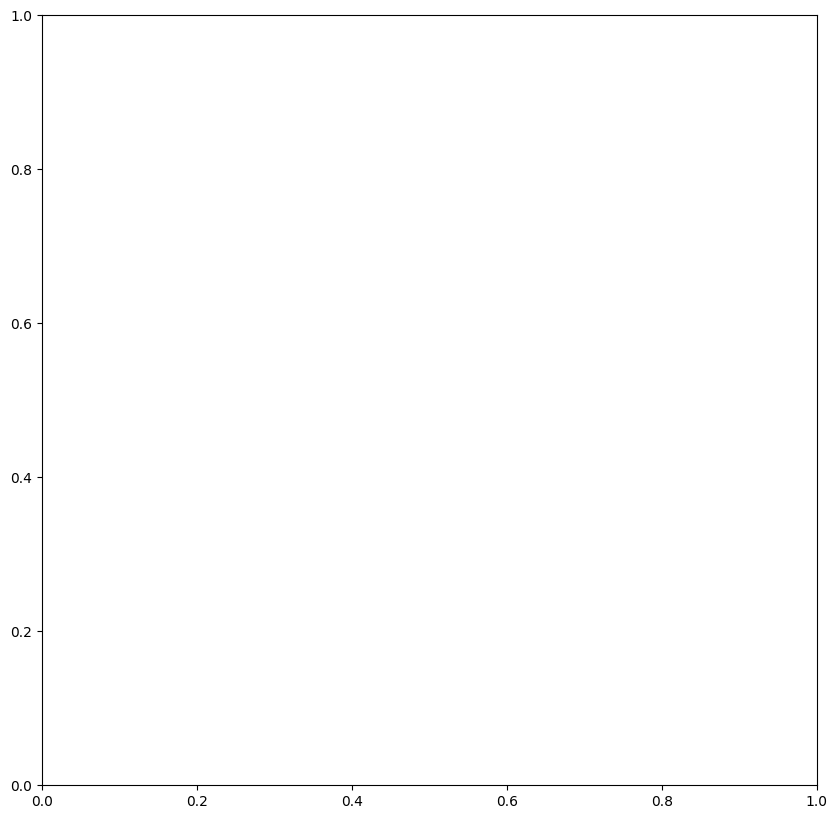

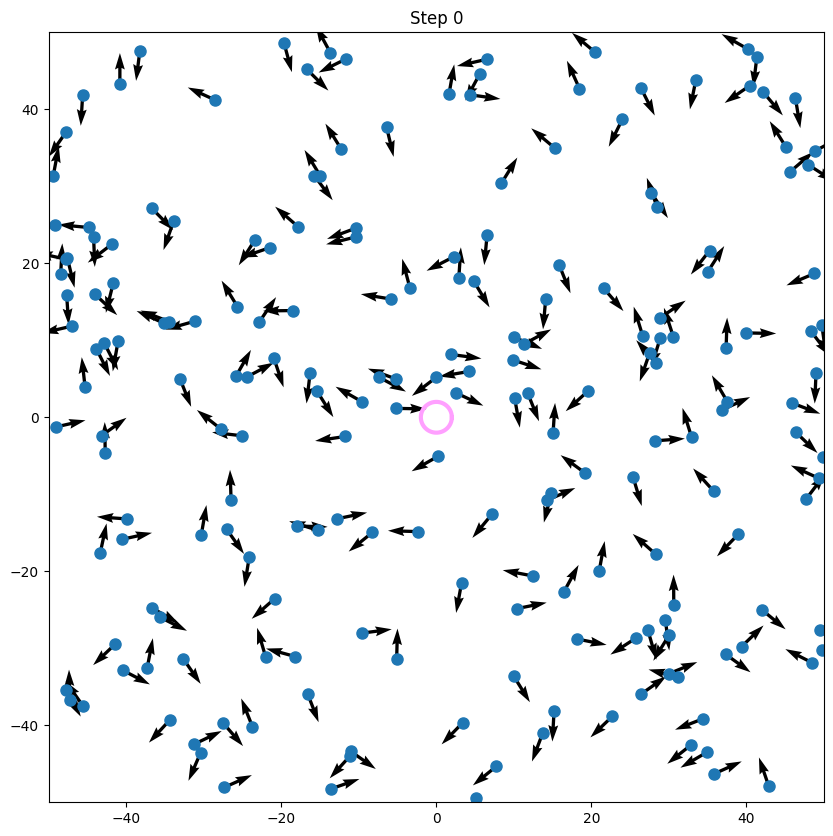

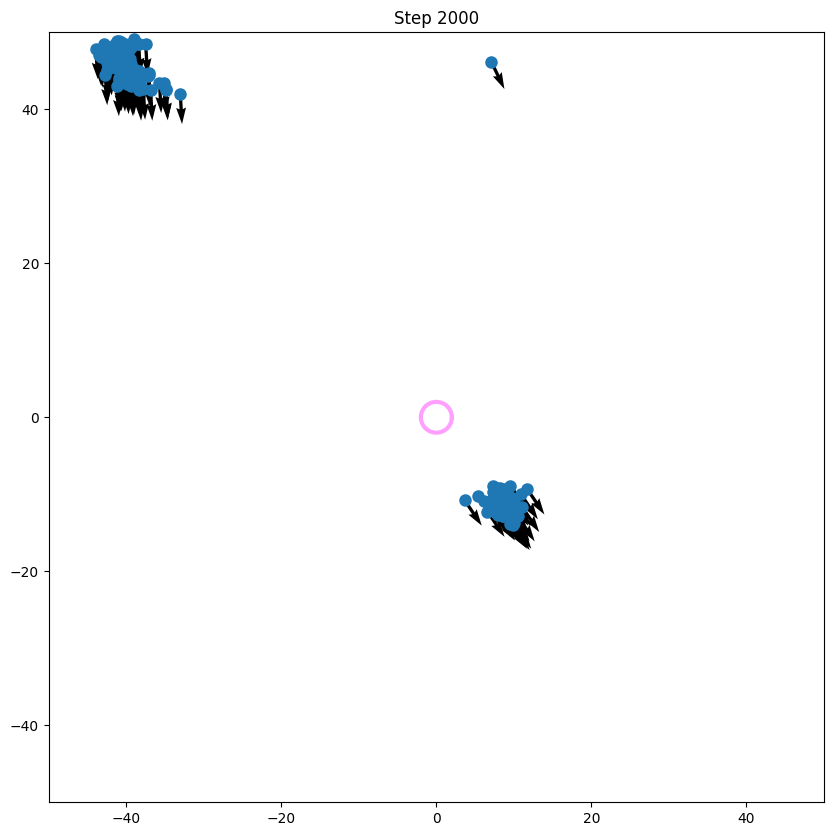

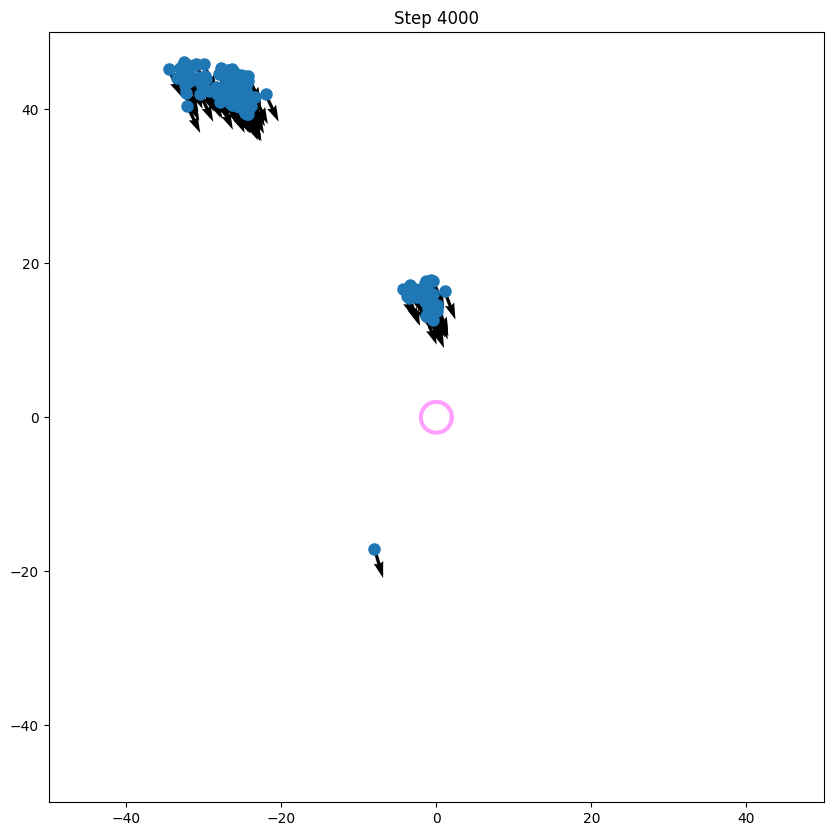

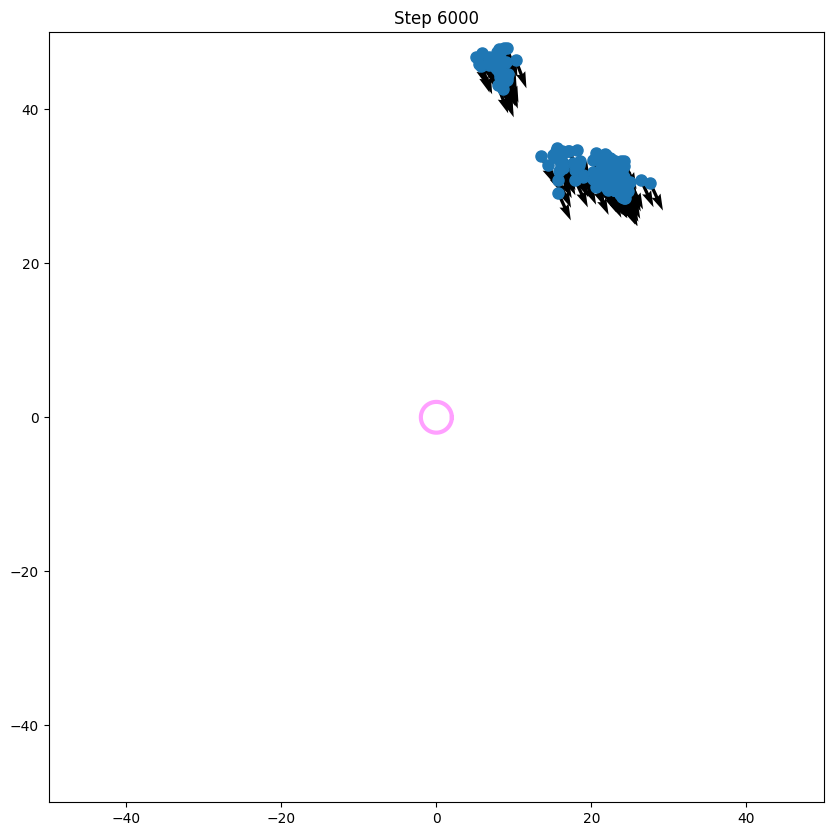

In [60]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import time

N_part = 200  # Number of particles.
L = 100  # Dimension of the squared arena.
v = 1  # Speed.
Rf = 2  # Flocking radius.
eta = 0.01  # Noise.  Try values: 0.01, 0.3, 1.0, 2 * np.pi
dt = 1  # Time step.

N_max_steps = 6900

psi = np.zeros(N_max_steps)  # Records the global alignment.
c = np.zeros(N_max_steps)  # Records the global clustering.

# Initialization.

# Random position.
x = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]
y = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]

# Random orientation.
theta = 2 * (np.random.rand(N_part) - 0.5) * np.pi  # in [-pi, pi]

# Initialize plot.
fig, ax = plt.subplots(figsize=(10, 10))

for step in range(N_max_steps):
    # Check whether plot configuration.
    if step % 2000 == 0:
        plt.figure(figsize=(10, 10))
        plt.plot(x, y, '.', markersize=16 )
        plt.quiver(x, y, np.cos(theta), np.sin(theta))
        plt.plot(Rf * np.cos(2 * np.pi * np.arange(360) / 360), 
        Rf * np.sin(2 * np.pi * np.arange(360) / 360), 
         '-', color='#FFA0FF', linewidth=3 )
        plt.title(f'Step {step}')
        plt.xlim([- L / 2, L / 2])
        plt.ylim([- L / 2, L / 2])
        plt.show()
            
    psi[step] = global_alignment(theta)
    c[step] = global_clustering(x, y, Rf, L)
    
    # Calculate next theta from the rule.
    dtheta = eta * (np.random.rand(N_part) - 0.5) * dt
    theta = interaction(x, y, theta, Rf, L) + dtheta
    x = x + v * np.cos(theta)
    y = y + v * np.sin(theta)
    
    # Reflecting boundary conditions.
    x, y = pbc(x, y, L)

#### **P2** - Plot global alignment and global clustering

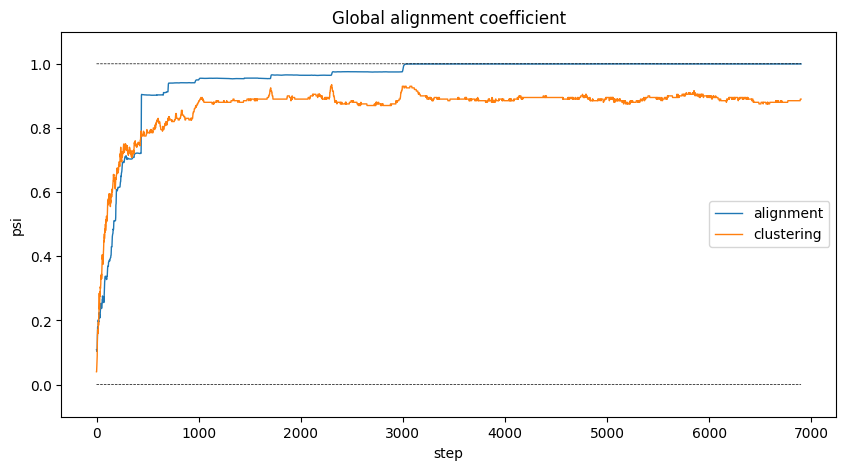

In [61]:
from matplotlib import pyplot as plt

# Plot the global alignment coefficient and global clustering

plt.figure(figsize=(10, 5))
plt.plot(psi, '-', linewidth=1, label='alignment')
plt.plot(c, '-', linewidth=1, label='clustering')
plt.plot(0 * psi, '--', color='k', linewidth=0.5)
plt.plot(0 * psi + 1, '--', color='k', linewidth=0.5)
plt.title('Global alignment coefficient')
plt.legend()
plt.xlabel('step')
plt.ylabel('psi')
plt.ylim([-0.1, 1.1])
plt.show()



#### **P3**

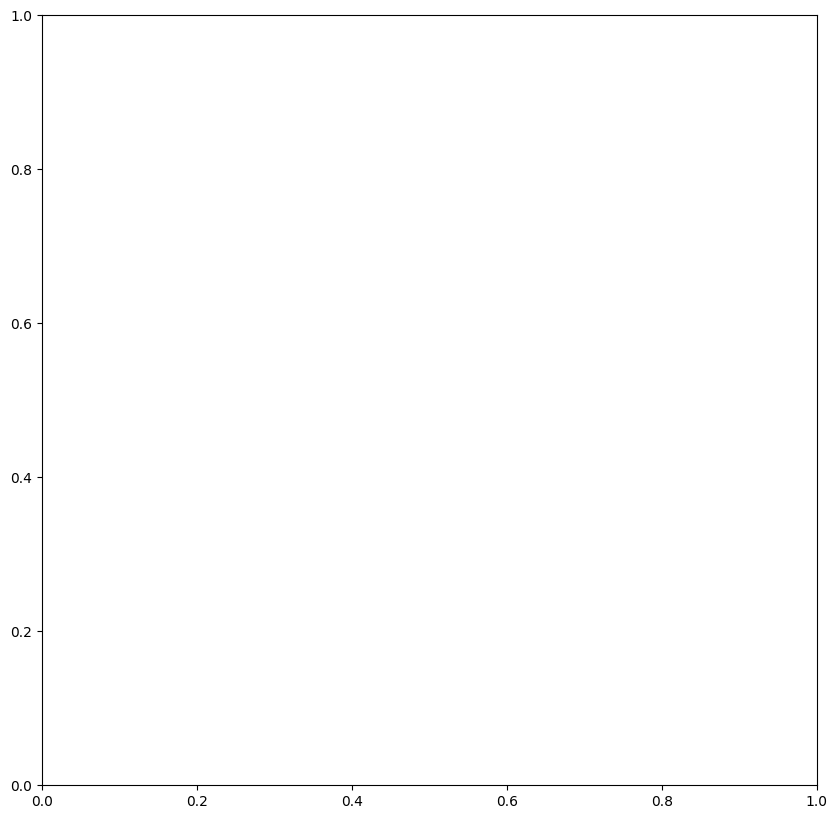

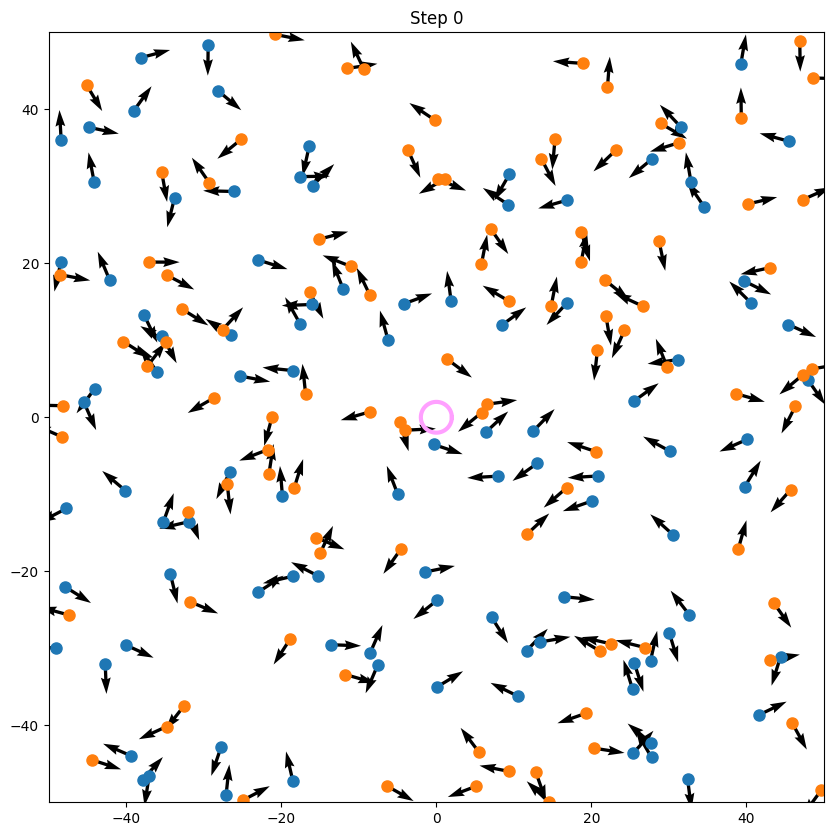

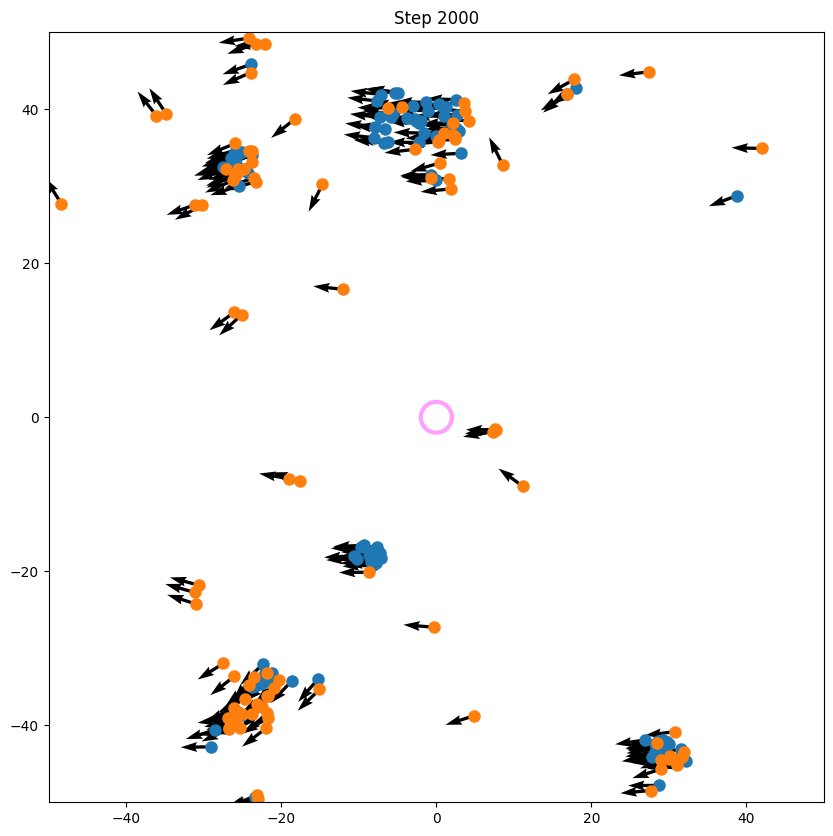

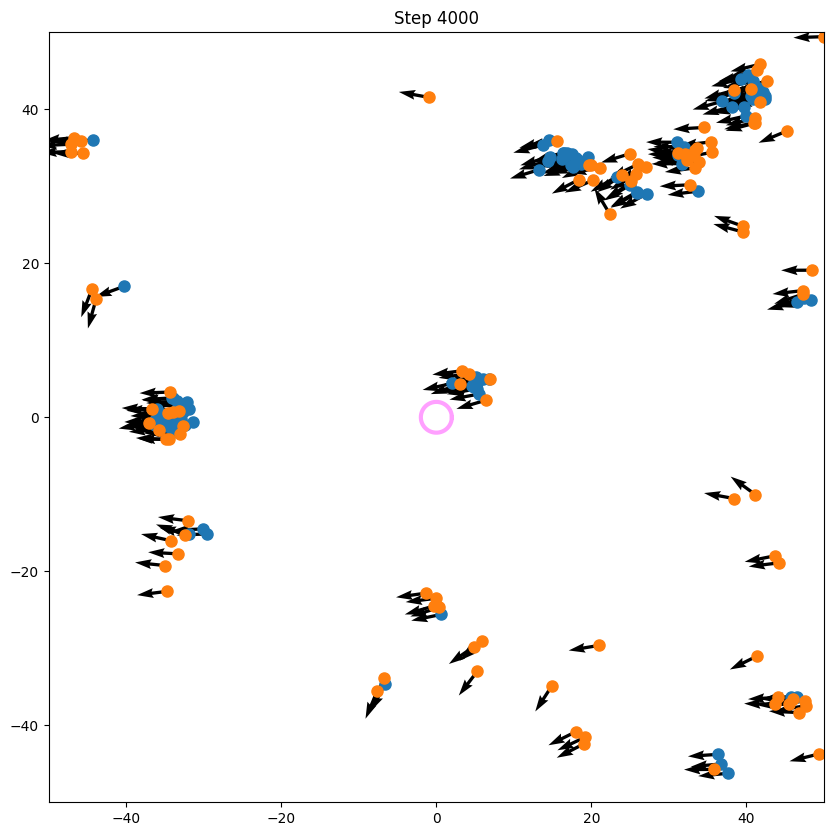

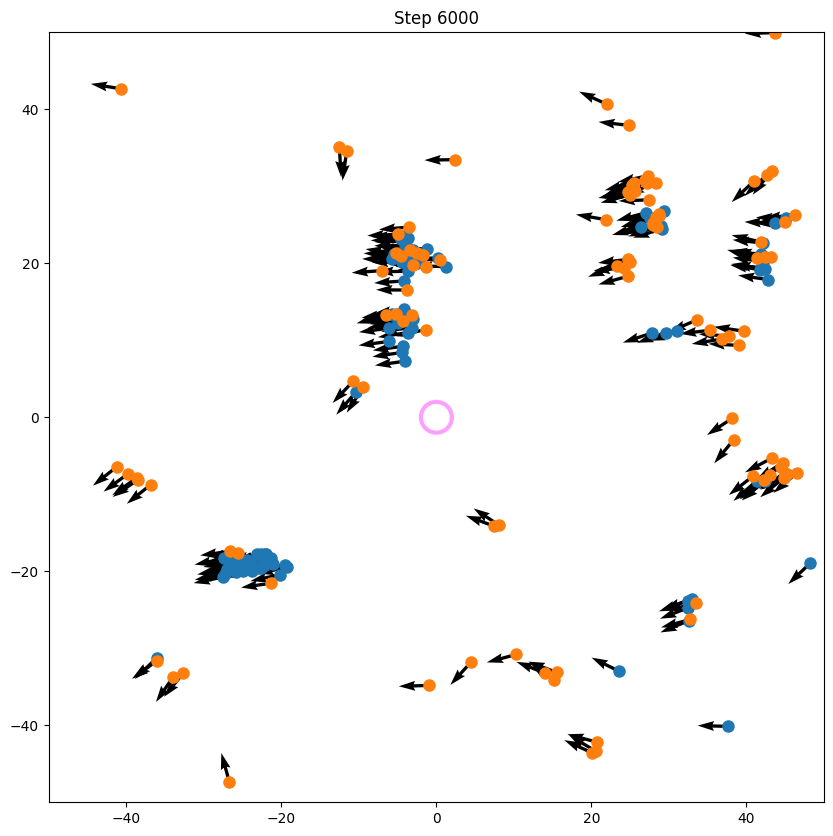

In [63]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import time

N_part = 200  # Number of particles.
L = 100  # Dimension of the squared arena.
v = 1  # Speed.
Rf = 2  # Flocking radius.
eta = 0.01  # Noise.  Try values: 0.01, 0.3, 1.0, 2 * np.pi
eta_mod = 0.3
dt = 1  # Time step.

N_max_steps = 6900

psi = np.zeros(N_max_steps)  # Records the global alignment.
c = np.zeros(N_max_steps)  # Records the global clustering.

# Initialization.

# Random position.
x = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]
y = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]

# Random orientation.
theta = 2 * (np.random.rand(N_part) - 0.5) * np.pi  # in [-pi, pi]

# Initialize plot.
fig, ax = plt.subplots(figsize=(10, 10))

for step in range(N_max_steps):
    # Check whether plot configuration.
    if step % 2000 == 0:
        plt.figure(figsize=(10, 10))
        plt.plot(x[0:100], y[0:100], '.', markersize=16 )
        plt.plot(x[100:], y[100:], '.', markersize=16)
        plt.quiver(x, y, np.cos(theta), np.sin(theta))
        plt.plot(Rf * np.cos(2 * np.pi * np.arange(360) / 360), 
        Rf * np.sin(2 * np.pi * np.arange(360) / 360), 
         '-', color='#FFA0FF', linewidth=3 )
        plt.title(f'Step {step}')
        plt.xlim([- L / 2, L / 2])
        plt.ylim([- L / 2, L / 2])
        plt.show()
            
    psi[step] = global_alignment(theta)
    c[step] = global_clustering(x, y, Rf, L)
    
    # Calculate next theta from the rule.
    dtheta1 = eta * (np.random.rand(int(N_part/2)) - 0.5) * dt
    dtheta2 = eta_mod * (np.random.rand(int(N_part/2)) - 0.5) * dt
    theta = interaction(x, y, theta, Rf, L)
    theta[0:100] += dtheta1
    theta[100:] += dtheta2
    x = x + v * np.cos(theta)
    y = y + v * np.sin(theta)
    
    # Reflecting boundary conditions.
    x, y = pbc(x, y, L)

#### **P4**

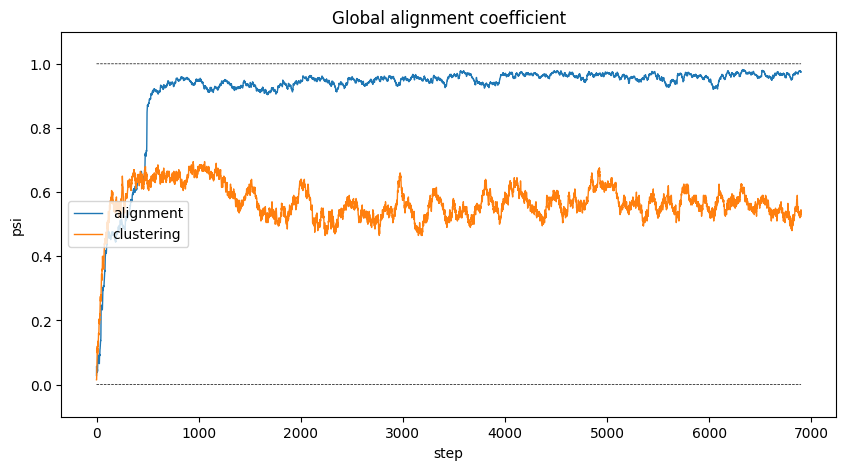

In [64]:
from matplotlib import pyplot as plt

# Plot the global alignment coefficient and global clustering

plt.figure(figsize=(10, 5))
plt.plot(psi, '-', linewidth=1, label='alignment')
plt.plot(c, '-', linewidth=1, label='clustering')
plt.plot(0 * psi, '--', color='k', linewidth=0.5)
plt.plot(0 * psi + 1, '--', color='k', linewidth=0.5)
plt.title('Global alignment coefficient')
plt.legend()
plt.xlabel('step')
plt.ylabel('psi')
plt.ylim([-0.1, 1.1])
plt.show()


#### **Q1** - Inspecting the animation of the simulation and the plot of $\psi$ and global custering coefficient $c$ as a function of the time step.

Population 1 groups up and aligns very quickly. Population 2 is very independent and don't tend to cluster.

The effect of having these two distinct populations seems to be that we get behaviour which seems to be a sort of "merge" between these two. Population 1 which earlier never ventured out seems to be up for some exploration while population 2 which would be independent when alone tend to group up more. In the graph we can kind of see this.

We get a mix of order and disorder. The main effect of introducing two subpopulations with distinct noise levels is a reduction in the global alignment $\psi$ and clustering $c$ coefficients.

In [ ]:
N_part = 200  # Number of particles.
L = 100  # Dimension of the squared arena.
v = 1  # Speed.
Rf = 2  # Flocking radius.
eta = 0.01  # Noise.  Try values: 0.01, 0.3, 1.0, 2 * np.pi
eta_mod = 0.3
dt = 1  # Time step.


# Initialization.

# Random position.
x = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]
y = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]

# Random orientation.
theta = 2 * (np.random.rand(N_part) - 0.5) * np.pi  # in [-pi, pi]

In [109]:
import time
from scipy.constants import Boltzmann as kB 
from tkinter import *

window_size = 600

rp = 0.5  # Plotting radius of a particle.
vp = 1  # Length of the arrow indicating the velocity direction.
line_width = 1  # Width of the arrow line.

N_skip = 1

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window 
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)

particles = []
for j in range(N_part):
    if(j < 100):
        particles.append(
            canvas.create_oval(
                (x[j] - rp) / L * window_size + window_size / 2, 
                (y[j] - rp) / L * window_size + window_size / 2,
                (x[j] + rp) / L * window_size + window_size / 2, 
                (y[j] + rp) / L * window_size + window_size / 2,
                outline='#0000FF', 
                fill='#0000FF',
            )
        )
    else:
        particles.append(
            canvas.create_oval(
                (x[j] - rp) / L * window_size + window_size / 2, 
                (y[j] - rp) / L * window_size + window_size / 2,
                (x[j] + rp) / L * window_size + window_size / 2, 
                (y[j] + rp) / L * window_size + window_size / 2,
                outline='#FFA500', 
                fill='#FFA500',
            )
        ) 


velocities = []
for j in range(N_part):
    velocities.append(
        canvas.create_line(
            x[j] / L * window_size + window_size / 2, 
            y[j] / L * window_size + window_size / 2,
            (x[j] + vp * np.cos(theta[j])) / L * window_size + window_size / 2, 
            (y[j] + vp * np.cos(theta[j])) / L * window_size + window_size / 2,
            width=line_width
        )
    )

step = 0

def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running:
    
    # Calculate next theta from the rule.
    dtheta1 = eta * (np.random.rand(int(N_part/2)) - 0.5) * dt
    dtheta2 = eta_mod * (np.random.rand(int(N_part/2)) - 0.5) * dt
    ntheta = interaction(x, y, theta, Rf, L) 
    ntheta[0:100] += dtheta1
    ntheta[100:] += dtheta2
    nx = x + v * np.cos(ntheta)
    ny = y + v * np.sin(ntheta)
    
    # Reflecting boundary conditions.
    nx, ny = pbc(nx, ny, L)
        
    # Update animation frame.
    if step % N_skip == 0:        
        for j, particle in enumerate(particles):
            canvas.coords(
                particle,
                (nx[j] - rp) / L * window_size + window_size / 2,
                (ny[j] - rp) / L * window_size + window_size / 2,
                (nx[j] + rp) / L * window_size + window_size / 2,
                (ny[j] + rp) / L * window_size + window_size / 2,
            )
                    
        for j, velocity in enumerate(velocities):
            canvas.coords(
                velocity,
                nx[j] / L * window_size + window_size / 2,
                ny[j] / L * window_size + window_size / 2,
                (nx[j] + vp * np.cos(ntheta[j])) / L * window_size + window_size / 2,
                (ny[j] + vp * np.sin(ntheta[j])) / L * window_size + window_size / 2,
            )
                    
        tk.title(f'Time {step * dt:.1f} - Iteration {step}')
        tk.update_idletasks()
        tk.update()
        time.sleep(.01)  # Increase to slow down the simulation.    

    step += 1
    x[:] = nx[:]
    y[:] = ny[:]
    theta[:] = ntheta[:]  

tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).

TclError: invalid command name ".!canvas"